# [Lab Session 2](otsu.ipynb)

In [30]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

In [31]:
imgf = plt.imread('data/NIH3T3/im/dna-0.png')

**[Task 1.2.]()** Quantify the image into 256 bins:

In [32]:
img8 = (imgf * 255).round().astype(np.uint8)

**[Task 1.3.]()** Compute the image histogram:

In [33]:
h = np.zeros(256, dtype =int) # Histogram Initialisieren 
for intensity in range(256): 
    h[intensity] = np.sum(img8 == intensity)

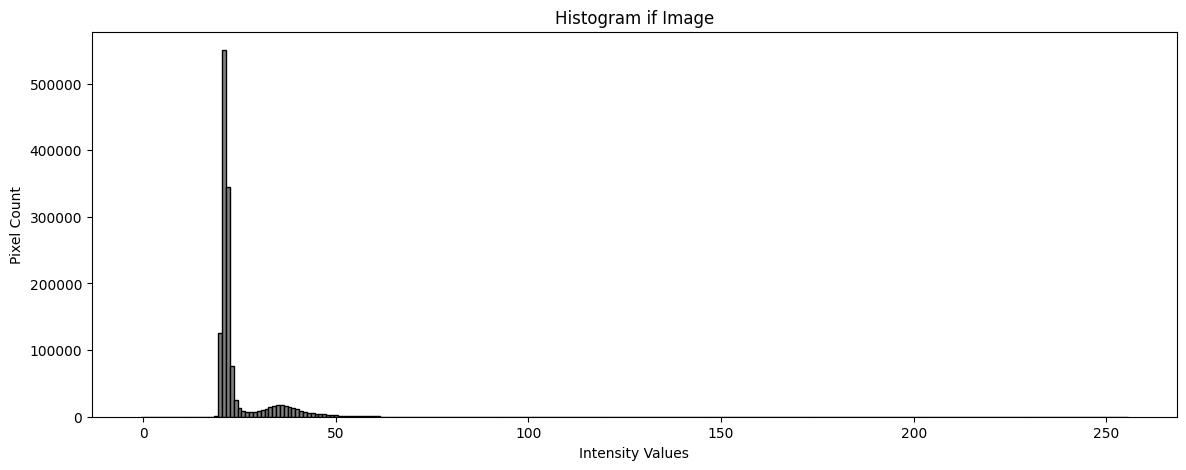

In [34]:
plt.figure(figsize = (14, 5))
plt.bar(range(256), h, width=1, color = 'gray', edgecolor = 'black')
plt.title('Histogram if Image')
plt.xlabel('Intensity Values')
plt.ylabel('Pixel Count')
plt.show()

Show the computed histogram:

<BarContainer object of 256 artists>

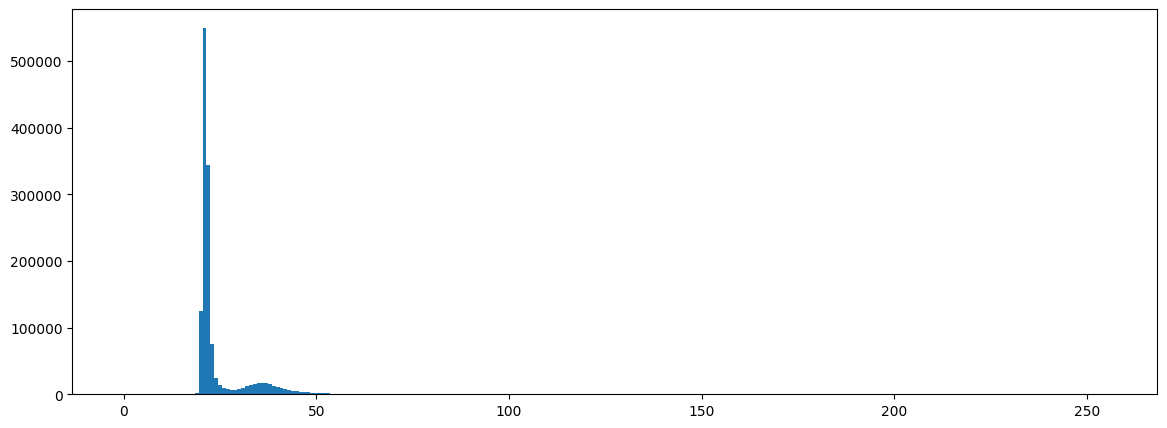

In [35]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [36]:
def otsu_threshold(h):
    total_pixels = np.sum(h)  # Gesamtanzahl der Pixel
    min_within_class_variance = float('inf')  # Initialisiere mit einem großen Wert
    best_threshold = 0  # Startwert für den besten Schwellenwert

    for T in range(1, 256):
        # Histogramm aufteilen
        h1 = h[:T]  # Intensitäten 0 bis T-1
        h2 = h[T:]  # Intensitäten T bis 255

        # Gesamtanzahl der Pixel in den Klassen
        total_no_pixelsh1 = np.sum(h1)
        total_no_pixelsh2 = np.sum(h2)

        # Prüfen, ob eine Klasse leer ist
        if total_no_pixelsh1 == 0 or total_no_pixelsh2 == 0:
            continue

        # Reziproke Pixelanzahl für die Klassen
        total_no_pixels_reziprokh1 = 1 / total_no_pixelsh1
        total_no_pixels_reziprokh2 = 1 / total_no_pixelsh2

        # Mittelwert für h1
        m1 = 0
        for I in range(len(h1)):
            m1 += I * h1[I]
        m1 = total_no_pixels_reziprokh1 * m1

        # Mittelwertsvarianz für h1
        miv1 = 0
        for I in range(len(h1)):
            miv1 += (I - m1) ** 2 * h1[I]
        miv1 = total_no_pixels_reziprokh1 * miv1

        # Mittelwert für h2
        m2 = 0
        for I in range(len(h2)):
            m2 += (T + I) * h2[I]
        m2 = total_no_pixels_reziprokh2 * m2

        # Mittelwertsvarianz für h2
        miv2 = 0
        for I in range(len(h2)):
            miv2 += ((T + I) - m2) ** 2 * h2[I]
        miv2 = total_no_pixels_reziprokh2 * miv2

        # Innerhalb-Klassen-Varianz berechnen
        within_class_variance = (total_no_pixelsh1 / total_pixels) * miv1 + \
                                (total_no_pixelsh2 / total_pixels) * miv2

        # Optimalen Schwellenwert finden
        if within_class_variance < min_within_class_variance:
            min_within_class_variance = within_class_variance
            best_threshold = T

    return best_threshold



**[Task 1.5.]()** Perform Otsu thresholding:

In [37]:
# Test mit Histogramm
T = otsu_threshold(h)

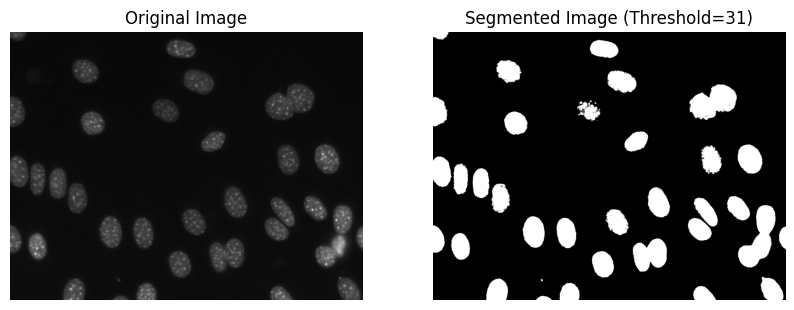

In [38]:
segmented_image = (img8 >= T).astype(np.uint8) * 255  

# Visualisierung
plt.figure(figsize=(10, 5))

# Originalbild
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img8, cmap='gray')
plt.axis('off')

# Segmentiertes Bild
plt.subplot(1, 2, 2)
plt.title(f"Segmented Image (Threshold={T})")
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

plt.show()

**[Task 1.6.]()** Compute the Dice coefficient:

In [39]:
gt = plt.imread('data/NIH3T3/gt/0.png')

def dice_coefficient(segmented_image, gt):
    # Binärisieren, falls nicht bereits binär --> Das Bild was wir hier haben ist nicht binärisiert, wodurch ein falscher Wert rauskam
    segmented_image = (segmented_image > 0).astype(np.uint8)
    gt = (gt > 0).astype(np.uint8)

    # Berechnung der Schnittmenge
    intersection = np.sum(segmented_image * gt)

    # Division durch 0 vermeiden
    if np.sum(segmented_image) + np.sum(gt) == 0:
        return 1.0 if intersection == 0 else 0.0

    # Dice-Koeffizient berechnen
    return 2 * intersection / (np.sum(segmented_image) + np.sum(gt))

dice_score = dice_coefficient(segmented_image, gt)
print("Dice-Koeffizient:", dice_score)

Dice-Koeffizient: 0.8943783223933183
